In [1]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Data Preparation and Visualization

## Loading the dataset
Nasa Turbofan Engine Remaining Lifetime dataset
(https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan )

In this tutorial, FD001 (one operating condition and one type of fault) and FD004 (six operating conditions and two types of faults) were included.

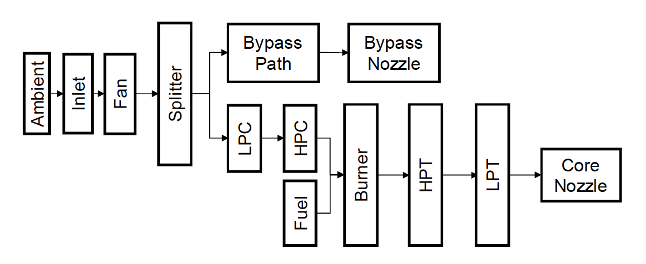

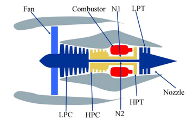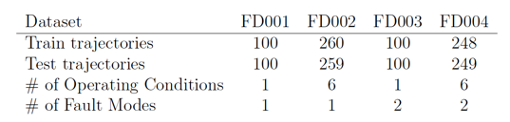

In [3]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # FD001 Training set
# # https://drive.google.com/file/d/1CHyNK9PXlzncNms4AMtFvXaAGcXzJifm/view?usp=sharing
# fd1_file_id = "1CHyNK9PXlzncNms4AMtFvXaAGcXzJifm"

# # FD004 Training set
# # https://drive.google.com/file/d/1gxdsJf0IHjo5X_SS-aTLsLOHEAzQHPLK/view?usp=sharing
# fd4_file_id = "1gxdsJf0IHjo5X_SS-aTLsLOHEAzQHPLK"

# downloaded = drive.CreateFile({'id': fd1_file_id})
# downloaded.GetContentFile('fd1_train.csv')
# print(os.listdir())
df_source=pd.read_csv('../data/fd1_train.csv')

# downloaded = drive.CreateFile({'id': fd4_file_id})
# downloaded.GetContentFile('fd4_train.csv')
# print(os.listdir())
df_target=pd.read_csv('../data/fd4_train.csv')

In [4]:
print(df_source.shape)
df_source.head()

(20631, 27)


,id,cycle,s1,s2,s3,s4,s5,s6,s7,s8,...,s16,s17,s18,s19,s20,s21,s22,s23,s24,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0


In [5]:
print(df_target.shape)
df_target.head()

(61249, 27)


,id,cycle,s1,s2,s3,s4,s5,s6,s7,s8,...,s16,s17,s18,s19,s20,s21,s22,s23,s24,rul
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320.0
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319.0
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318.0
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317.0
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316.0


## Rreminaing useful life (RUL) with plateau
RUL parameter is consider as the value which we want to predict. basically we consider any unit that has RUL >= 130 cycles as healthy (enough) equipment.

In [6]:
df_source.loc[df_source["rul"]>=130, "rul"] = 130
df_target.loc[df_target["rul"]>=130, "rul"] = 130

## Visualizing the data
* Plotting values of sensor 5 and operating cycle for engine number 1. 
* Plotting the corresponding RUL values and operating cycle for engine number 1.

<Figure size 640x480 with 0 Axes>

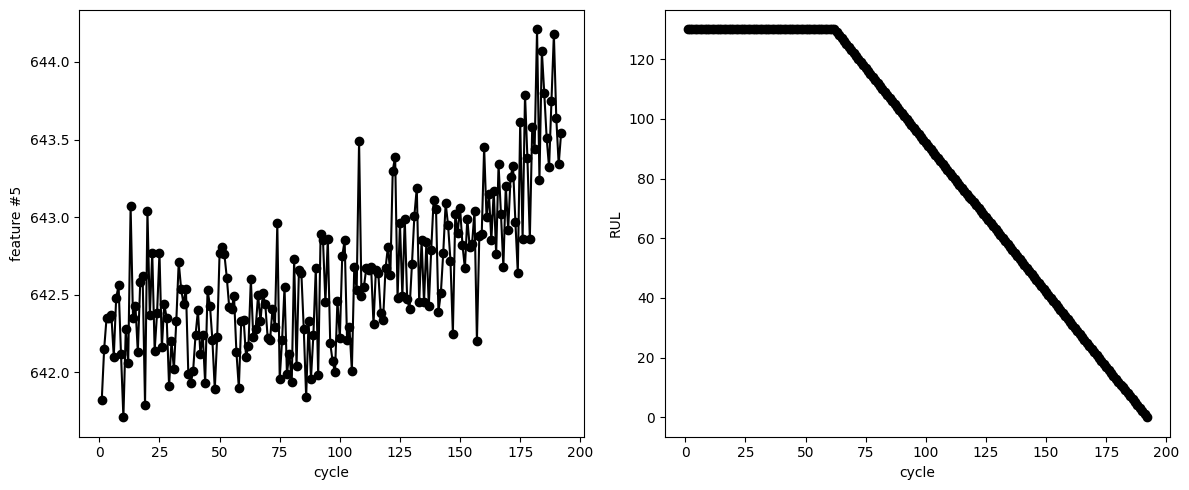

In [9]:
X_ds = df_source[df_source["id"] == 1]

plt.clf()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
axs[0].plot(X_ds["cycle"].values, X_ds["s5"].values, '-ok')
axs[1].plot(X_ds["cycle"].values, X_ds["rul"].values, '-ok')

axs[0].set_xlabel("cycle")
axs[0].set_ylabel("feature #5")

axs[1].set_xlabel("cycle")
axs[1].set_ylabel("RUL")

fig.tight_layout()
plt.show()



* plotting the same feature 5 for engine unit 1 for both source and target domain
  * Do they look similar?

<Figure size 640x480 with 0 Axes>

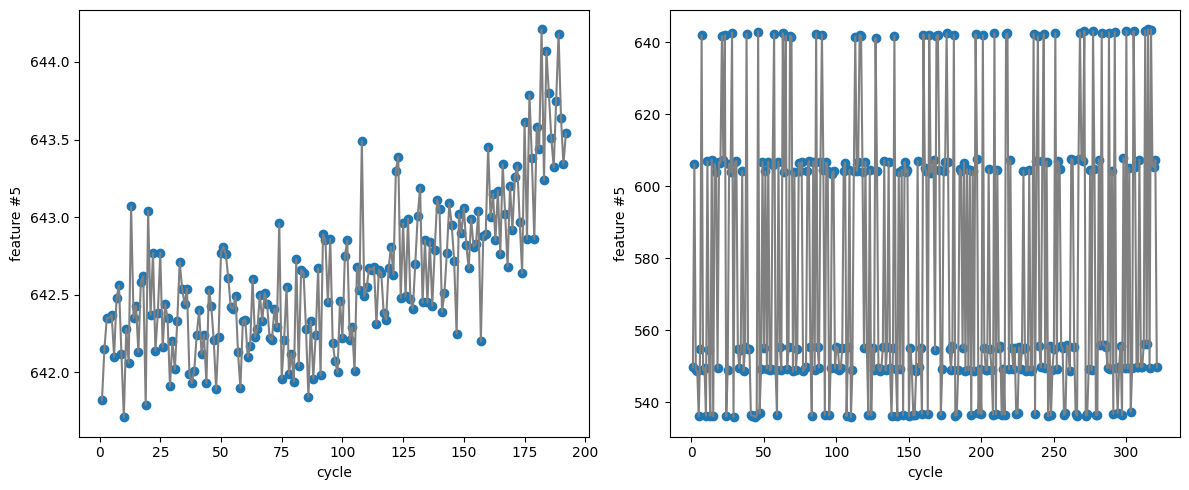

In [11]:
X_ds = df_source[df_source["id"] == 1]
X_dt = df_target[df_target["id"] == 1]

plt.clf()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
axs[0].scatter(X_ds["cycle"], X_ds["s5"])
axs[0].plot(X_ds["cycle"].values, X_ds["s5"].values, c="gray")
#axs[0].set_ylim([])

axs[1].scatter(X_dt["cycle"], X_dt["s5"])
axs[1].plot(X_dt["cycle"].values, X_dt["s5"].values, c="gray")

axs[0].set_xlabel("cycle")
axs[0].set_ylabel("feature #5")

axs[1].set_xlabel("cycle")
axs[1].set_ylabel("feature #5")

fig.tight_layout()
plt.show()



visualizing all features for engine unit 1 in the target doamin

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24']


<Figure size 640x480 with 0 Axes>

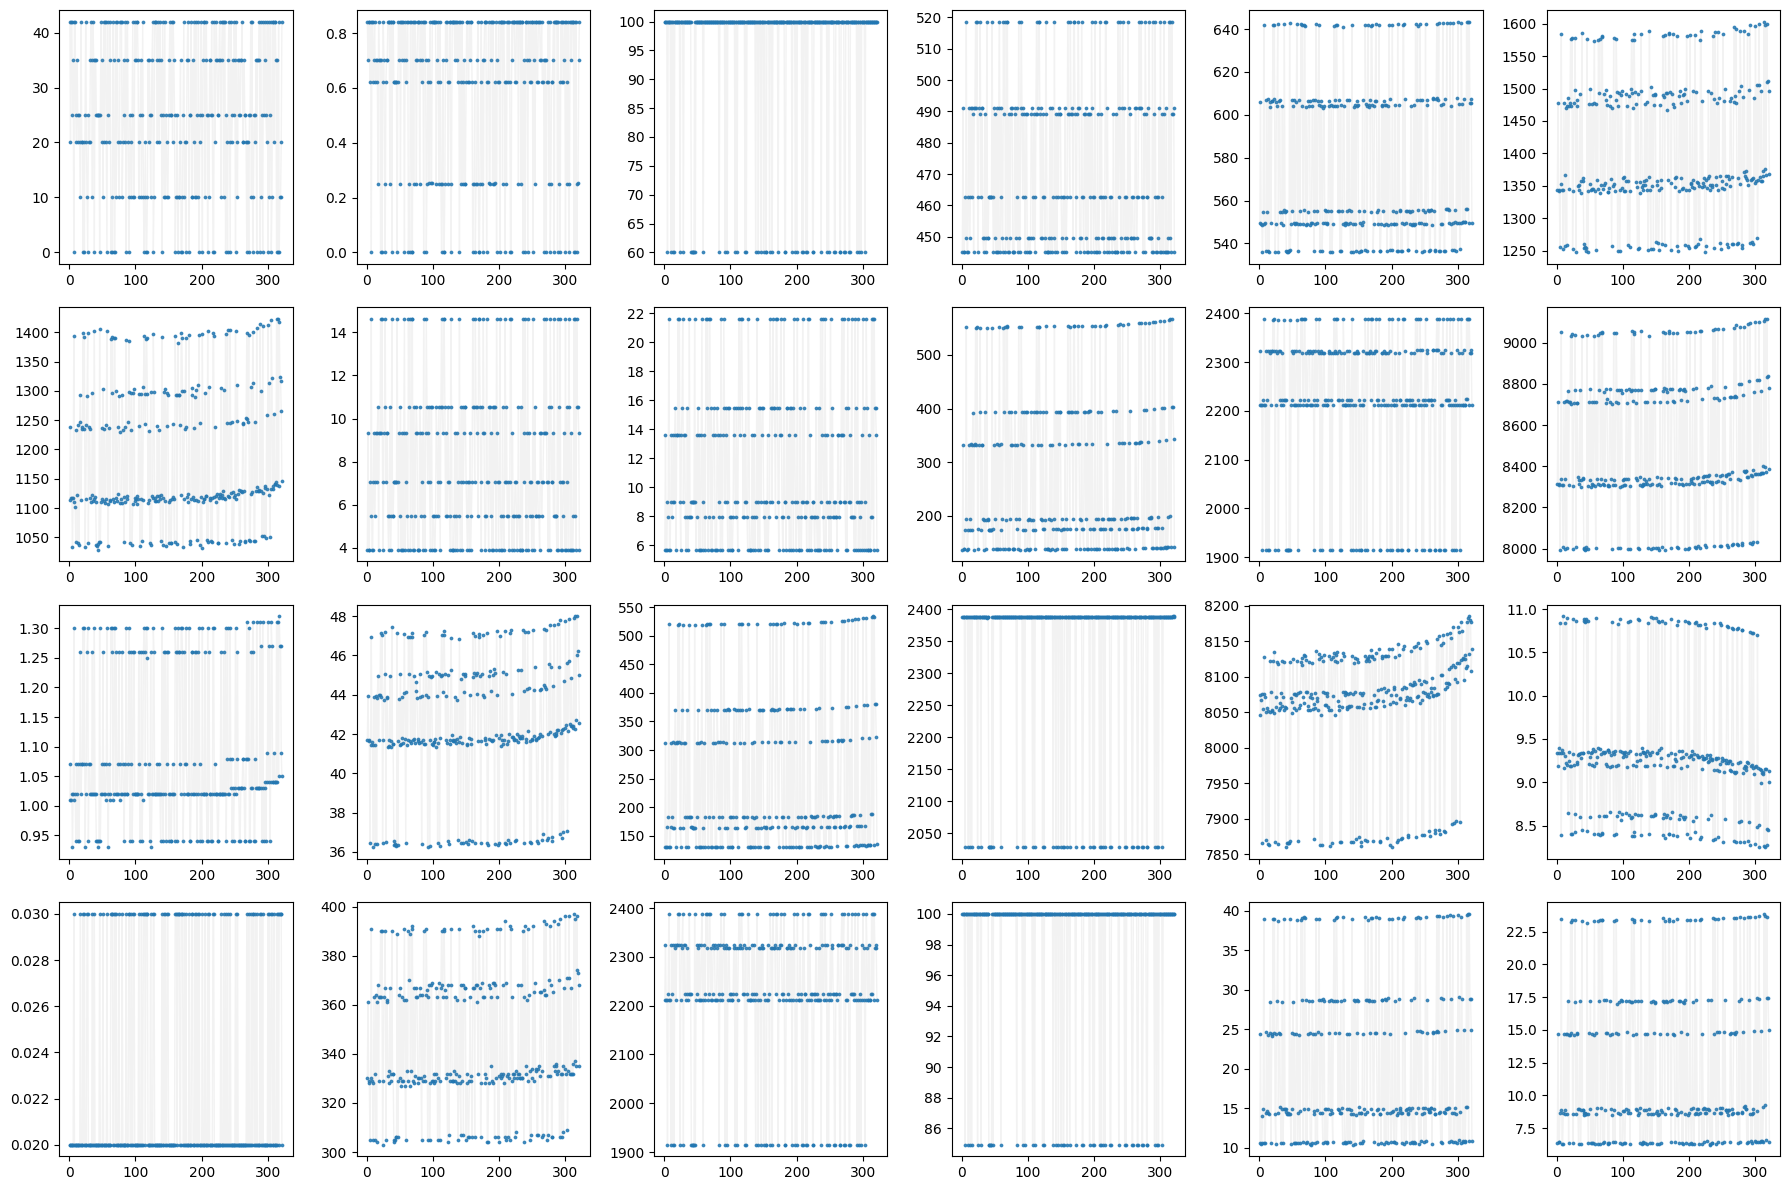

In [12]:
X_ds = df_source[df_source["id"] == 1]
X_dt = df_target[df_target["id"] == 1]

features = [xx for xx in X_ds.columns if "s" in xx]
print(features)

X_unit = X_dt.copy()

plt.clf()

fig, axs = plt.subplots(4, 6, figsize=(18, 12))

for irow in range(4):
    for icol in range(6):
        
        x, y = X_unit["cycle"].values, X_unit[features[int(irow*6+icol)]].values
        
        axs[irow, icol].plot(x, y, c="gray", alpha=0.1, lw=1)
        axs[irow, icol].scatter(x, y, alpha=0.8, s=3)
        
plt.tight_layout()



visualizing all features for engine unit 1 for the both source and target doamins

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24']


<Figure size 640x480 with 0 Axes>

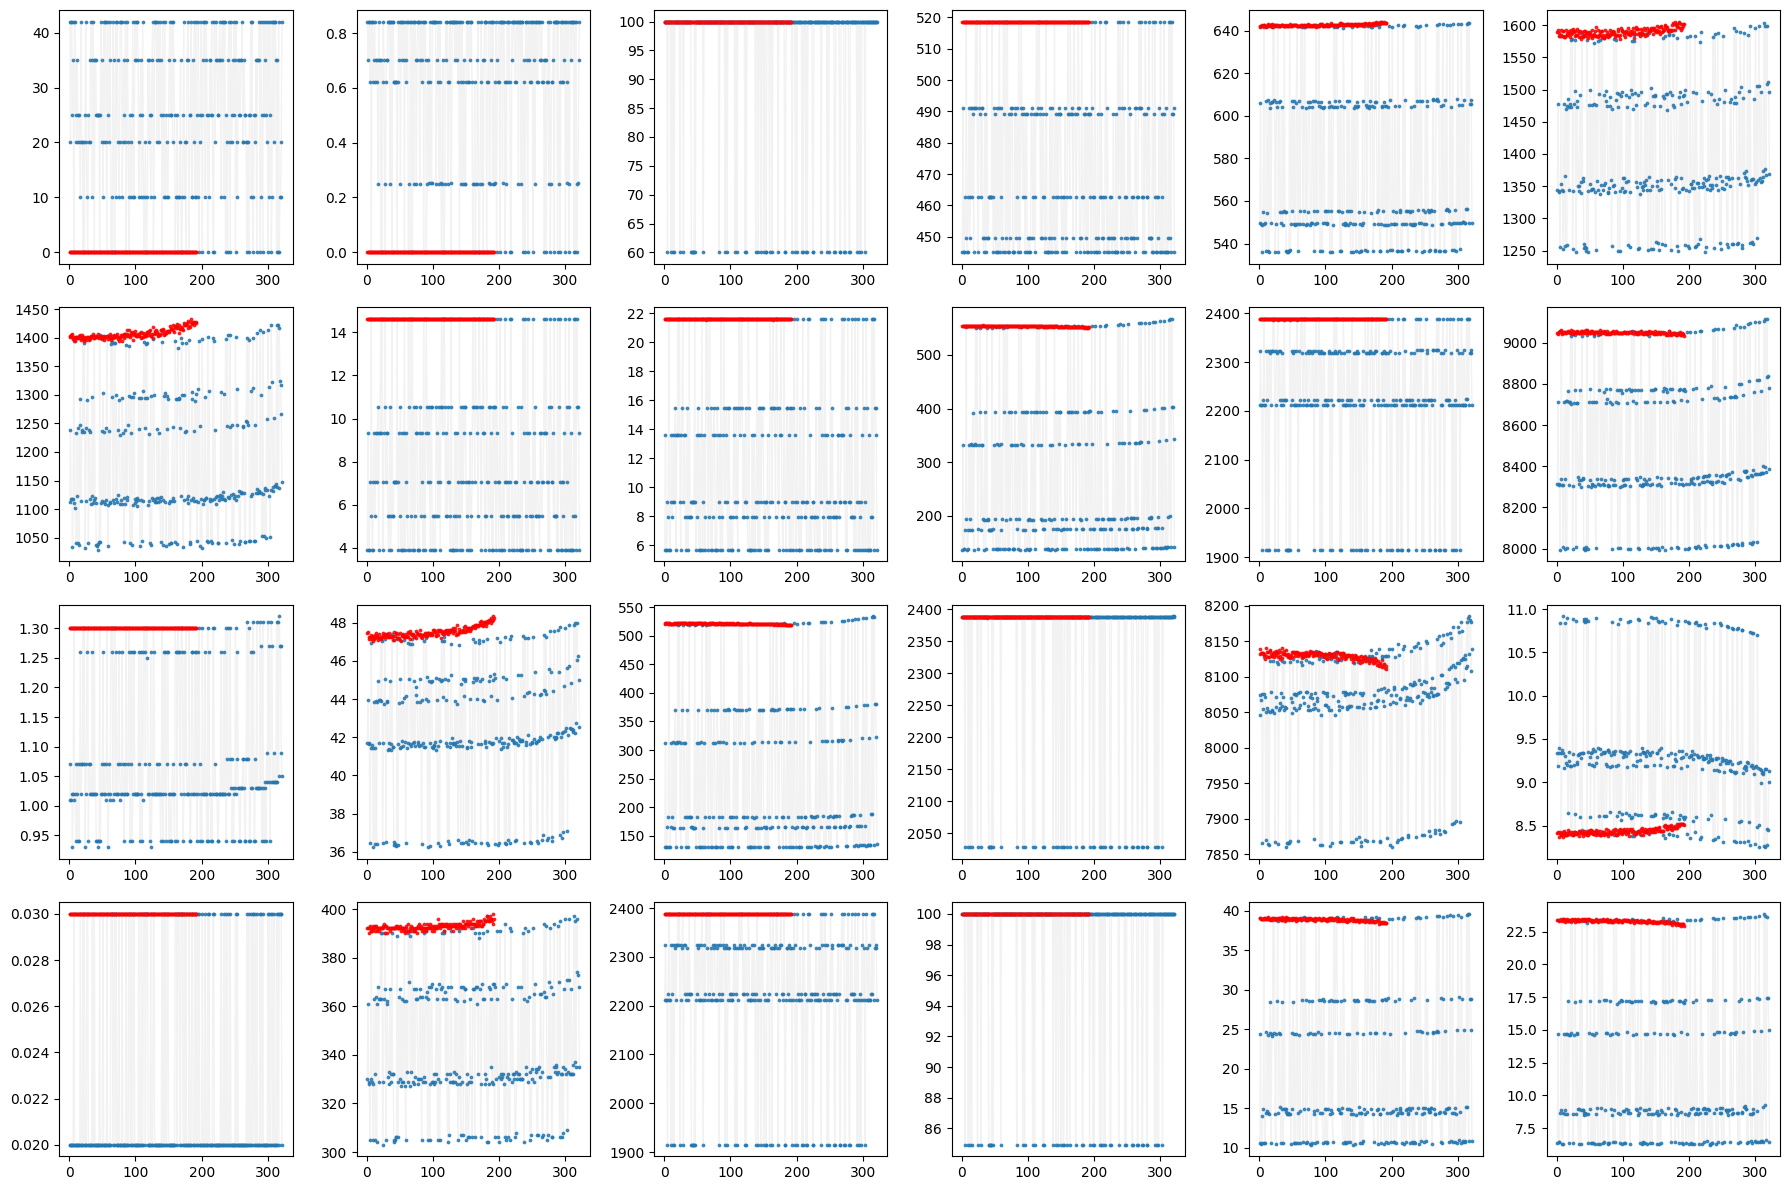

In [14]:
# TODO
X_ds = df_source[df_source["id"] == 1]
X_dt = df_target[df_target["id"] == 1]

features = [xx for xx in X_ds.columns if "s" in xx]
print(features)

X_unit = X_dt.copy()

plt.clf()

fig, axs = plt.subplots(4, 6, figsize=(18, 12))

for irow in range(4):
    for icol in range(6):
        
        x, y = X_unit["cycle"].values, X_unit[features[int(irow*6+icol)]].values
        
        axs[irow, icol].plot(x, y, c="gray", alpha=0.1, lw=1)
        axs[irow, icol].scatter(x, y, alpha=0.8, s=3)

        x_s, y_s = X_ds["cycle"].values, X_ds[features[int(irow*6+icol)]].values
        axs[irow, icol].scatter(x_s, y_s, alpha=0.8, s=3, c='r')
        
plt.tight_layout()

In [15]:
# preparing samples

# set training and testing population for the source domain
# set testing population for the target domain
# make sure there is no information leakage

source_units = random.sample(list(df_source["id"].unique()), 40)
source_units_train = source_units[:20]
source_units_test = source_units[-20:]
target_units = random.sample(list(df_target["id"].unique()), 20)

print("selected source units", source_units)
print("selected target units", target_units)

selected source units [63, 18, 50, 6, 98, 49, 93, 30, 91, 38, 74, 52, 86, 100, 26, 1, 97, 41, 27, 45, 2, 7, 44, 59, 62, 25, 40, 24, 92, 35, 48, 99, 96, 95, 36, 90, 15, 22, 23, 4]
selected target units [196, 15, 184, 71, 132, 37, 190, 140, 168, 231, 124, 178, 158, 69, 30, 31, 238, 235, 193, 131]


## Evaluation Metric
We use *mean absolute percentage error (MAPE)* as the scoring function which is commonly used as a loss function for regression problems. It measures the accuracy as a percentage by calculating mean absolute percentage of the difference between the actual value and predicted value divide by the predicted value.

In [16]:
# scoring function with mean absolute percentage error
# we weight near failure samples higher

def compute_mape(y_test, y_pred):
    ae = [abs(y_test[ix]-y_pred[ix])/y_test[ix] for ix, xx in enumerate(y_test) if y_test[ix] != 0]
    return np.mean(ae)

## Modeling the baseline model - random forest regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# prepating training and test sets on source damain
Xs = df_source[df_source["id"].isin(source_units_train)]
Xs_test = df_source[df_source["id"].isin(source_units_test)]

# prepating test set on target damain
Xt = df_target[df_target["id"].isin(target_units)]

x_var = [xx for xx in df_source.columns if xx != "rul"] 
target_var = "rul"
print(x_var)
print(target_var)

# training a random forest regressor on the source domain data
regr = RandomForestRegressor()
regr.fit(Xs[x_var], Xs[target_var])

# Testing on the source domain
y_test_ds = regr.predict(Xs_test[x_var])
mae_ds = metrics.mean_absolute_error(y_test_ds, Xs_test[target_var])
mse_ds = metrics.mean_squared_error(y_test_ds, Xs_test[target_var])
mape_ds = compute_mape(Xs_test[target_var].tolist(), y_test_ds)

# for the target domain
y_test_dt = regr.predict(Xt[x_var])
mae_dt = metrics.mean_absolute_error(y_test_dt, Xt[target_var])
mse_dt = metrics.mean_squared_error(y_test_dt, Xt[target_var])
mape_dt = compute_mape(Xt[target_var].tolist(), y_test_dt)

print("calculating performance measures on unseen data from source and target")
print("mean absolute error: ", mae_ds, mae_dt)
print("mean squared error: ", mse_ds, mse_dt)
print("mean absolute percentage error: ", mape_ds, mape_dt)


['id', 'cycle', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24']
rul
calculating performance measures on unseen data from source and target
mean absolute error:  18.11653253621522 30.621856763925724
mean squared error:  771.8404544492987 1440.5078449033726
mean absolute percentage error:  0.2716059396166958 1.0356323122258282


In [18]:
# cross-validation over different units

from sklearn.model_selection import KFold

source_units = random.sample(list(df_source["id"].unique()), 40)
target_units = random.sample(list(df_target["id"].unique()), 40)
nn_fold = 4

print("selected source units", source_units)
print("selected target units", target_units)

kf = KFold(n_splits=nn_fold, shuffle=True, random_state=42)

kf_cc = 1

scores_cv_ds = {metric:[] for metric in ["MAE", "MSE", "MAPE"]}
scores_cv_dt = {metric:[] for metric in ["MAE", "MSE", "MAPE"]}

# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(source_units):
    print(f'Fold:{kf_cc}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    kf_cc += 1

    Xs = df_source[df_source["id"].isin(np.array(source_units)[train_index])]
    Xs_test = df_source[df_source["id"].isin(np.array(source_units)[test_index])]
    Xt = df_target[df_target["id"].isin(np.array(target_units)[test_index])]
    
    #print(Xs["id"].unique())
    #print(Xs_test["id"].unique())
    #print(Xt["id"].unique())

    regr = RandomForestRegressor()
    regr.fit(Xs[x_var], Xs[target_var])

    # for the same domain

    y_test_ds = regr.predict(Xs_test[x_var])
    mae_ds = metrics.mean_absolute_error(y_test_ds, Xs_test[target_var])
    mse_ds = metrics.mean_squared_error(y_test_ds, Xs_test[target_var])
    mape_ds = compute_mape(Xs_test[target_var].tolist(), y_test_ds)

    # for the target domain

    y_test_dt = regr.predict(Xt[x_var])
    mae_dt = metrics.mean_absolute_error(y_test_dt, Xt[target_var])
    mse_dt = metrics.mean_squared_error(y_test_dt, Xt[target_var])
    mape_dt = compute_mape(Xt[target_var].tolist(), y_test_dt)

    for metric, val in zip(["MAE", "MSE", "MAPE"], [mae_ds, mse_ds, mape_ds]):
        scores_cv_ds[metric].append(val)

    for metric, val in zip(["MAE", "MSE", "MAPE"], [mae_dt, mse_dt, mape_dt]):
        scores_cv_dt[metric].append(val)

print()
print("Metric", "| ds", "| dt")

for metric in ["MAE", "MSE", "MAPE"]:
    print(f"{metric:5}| {np.mean(scores_cv_ds[metric]):.4f} ± {np.std(scores_cv_ds[metric]):.4f} | {np.mean(scores_cv_dt[metric]):.4f} ± {np.std(scores_cv_dt[metric]):.4f} | ")

selected source units [99, 77, 23, 84, 88, 83, 14, 52, 30, 41, 54, 26, 11, 47, 9, 8, 58, 76, 17, 20, 80, 100, 35, 57, 66, 7, 69, 2, 19, 32, 36, 62, 37, 45, 98, 56, 4, 38, 46, 39]
selected target units [174, 228, 14, 107, 216, 68, 194, 140, 39, 82, 195, 20, 78, 167, 163, 56, 127, 95, 178, 187, 171, 139, 81, 155, 42, 109, 124, 138, 108, 117, 203, 98, 25, 231, 185, 84, 44, 236, 74, 179]
Fold:1, Train set: 30, Test set:10
Fold:2, Train set: 30, Test set:10
Fold:3, Train set: 30, Test set:10
Fold:4, Train set: 30, Test set:10

Metric | ds | dt
MAE  | 13.5677 ± 1.8103 | 29.8177 ± 0.8603 | 
MSE  | 397.4524 ± 93.8081 | 1307.2238 ± 50.5359 | 
MAPE | 0.2559 ± 0.0306 | 1.2422 ± 0.1154 | 
